In [1]:
#IMPORTACIONES DE LIBRERÍAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [2]:
#CARGAR DATOS
try:
    movies_metadata = pd.read_parquet("datasets/movies_dataset.parquet")
except Exception as e:
    print(f"Error al cargar los archivos PARQUET: {e}")

sns.set(style="whitegrid") #ESTILO DE GRAFICO

carpeta_graficos = 'Graficos' #carpeta para exportar graficos

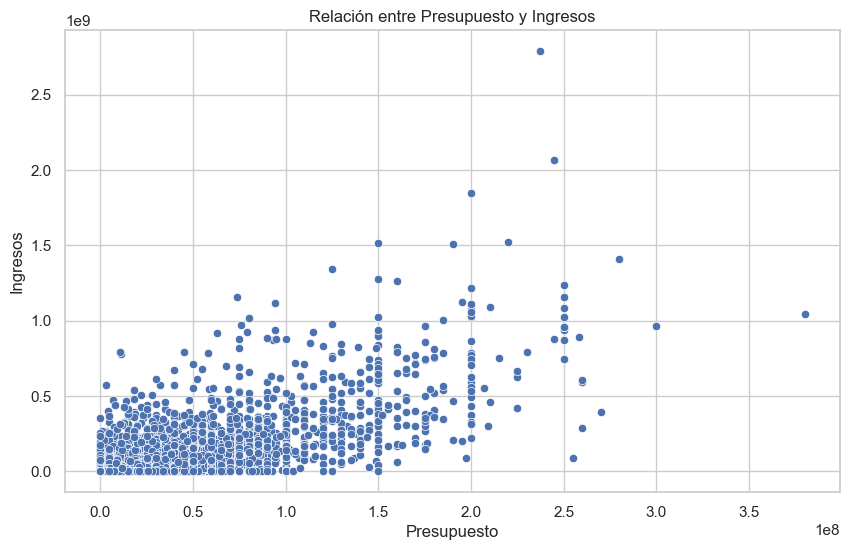

In [3]:
#GRAFICO 1, RELACIÓN ENTRE PRESUPUESTO E INGRESOS DE PELICULAS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=movies_metadata)
plt.title('Relación entre Presupuesto y Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.savefig(os.path.join(carpeta_graficos, 'presupuesto-ingresos.png'))
plt.show()

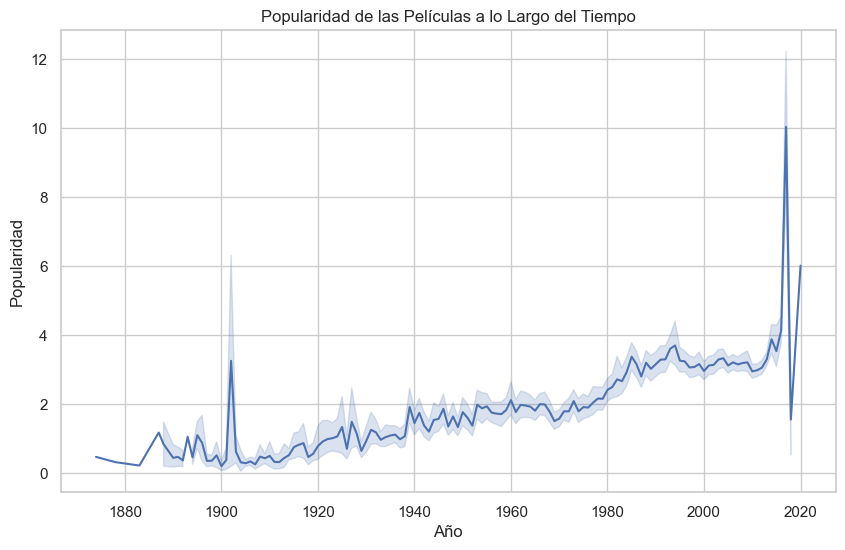

In [4]:
#GRAFICO 2, POPULARIDAD DE LAS PELICULAS A LO LARGO DEL TIEMPO
plt.figure(figsize=(10, 6))
movies_metadata['release_year'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce').dt.year
sns.lineplot(x='release_year', y='popularity', data=movies_metadata)
plt.title('Popularidad de las Películas a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.savefig(os.path.join(carpeta_graficos, 'popularidad-tiempo.png'))
plt.show()

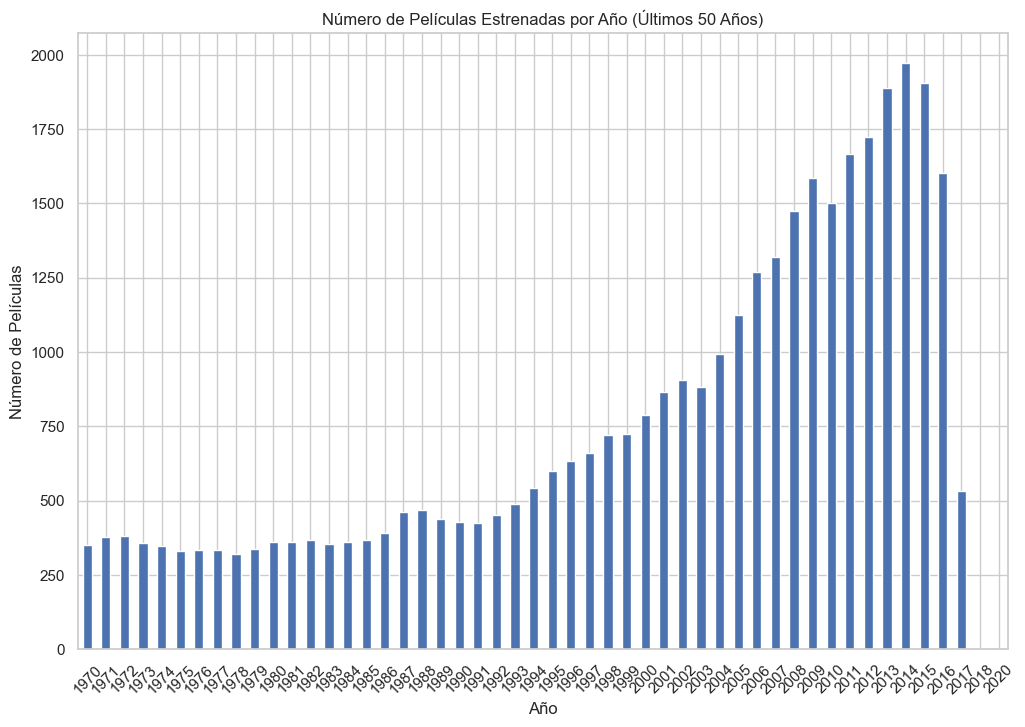

In [5]:
#GRAFICO 3, CANTIDAD DE PELICULAS EXTRENADAS EN LOS ULTIMOS 50 AÑOS
#preparar los datos para el grafico
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year
recent_years = movies_metadata['release_year'].dropna().astype(int).value_counts().sort_index(ascending=False).head(50)

plt.figure(figsize=(12, 8))
recent_years.sort_index().plot(kind='bar')
plt.title('Número de Películas Estrenadas por Año (Últimos 50 Años)')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.savefig(os.path.join(carpeta_graficos, 'cantidad-extrenos.png'))
plt.show()

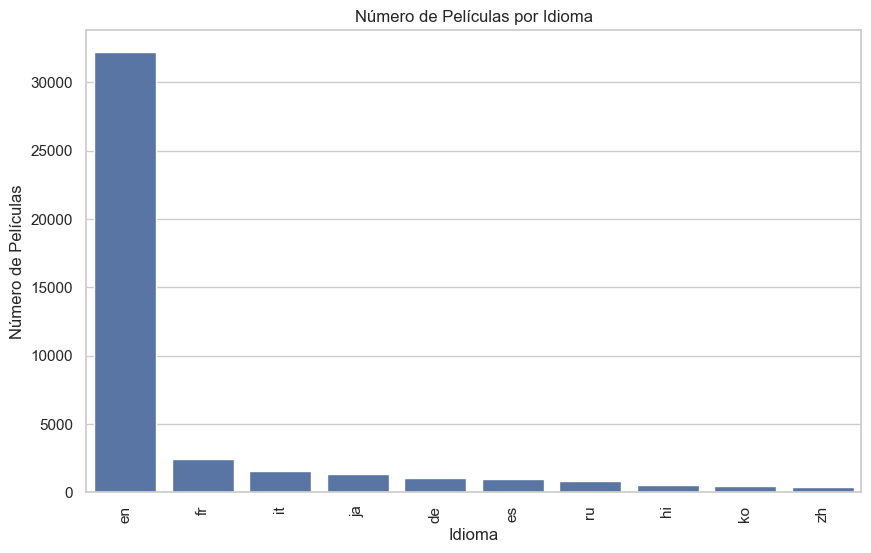

In [6]:
#GRAFICO 4, CANTIDAD POR IDIOMA
plt.figure(figsize=(10, 6))
languages_count = movies_metadata['original_language'].value_counts().head(10)
sns.barplot(x=languages_count.index, y=languages_count.values)
plt.title('Número de Películas por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.savefig(os.path.join(carpeta_graficos, 'peliculas-x-idioma.png'))
plt.show()

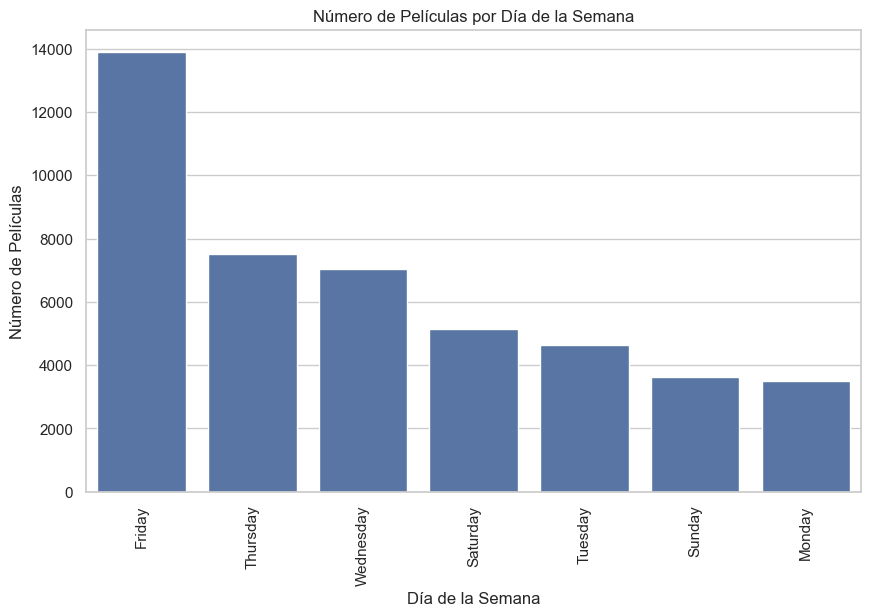

In [7]:
#GRAFICO 5, PELICULAS POR DÍA DE SEMANA
try:
    movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
    movies_metadata['day_of_week'] = movies_metadata['release_date'].dt.day_name()
    day_counts = movies_metadata['day_of_week'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=day_counts.index, y=day_counts.values)
    plt.title('Número de Películas por Día de la Semana')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Número de Películas')
    plt.xticks(rotation=90)
    plt.savefig(os.path.join(carpeta_graficos, 'extrenos-por-dia.png'))
    plt.show()
except Exception as e:
    print(f"Error al procesar días de la semana: {e}")

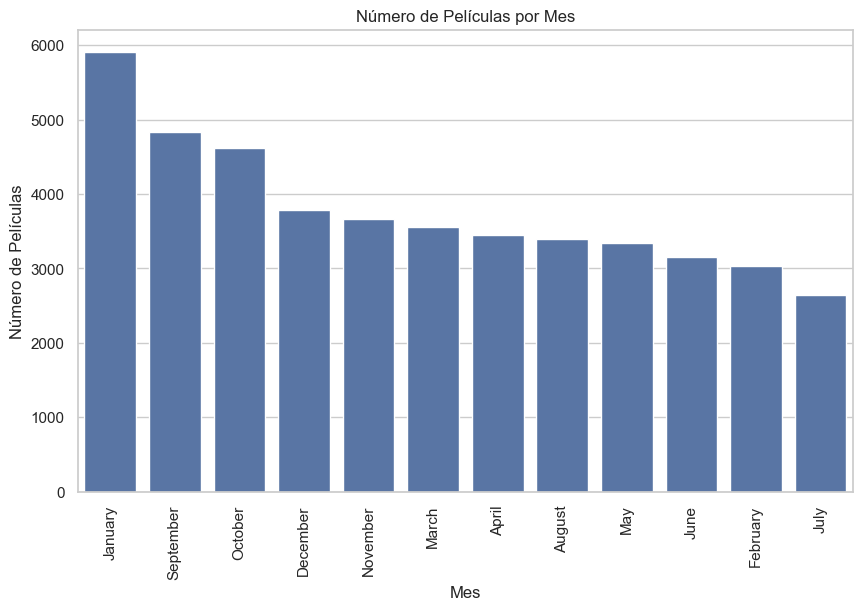

In [8]:
#GRAFICO 6, PELICULAS POR MES
try:
    movies_metadata['month'] = movies_metadata['release_date'].dt.month_name()
    month_counts = movies_metadata['month'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=month_counts.index, y=month_counts.values)
    plt.title('Número de Películas por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Número de Películas')
    plt.xticks(rotation=90)
    plt.savefig(os.path.join(carpeta_graficos, 'extrenos-por-mes.png'))
    plt.show()
except Exception as e:
    print(f"Error al procesar meses: {e}")

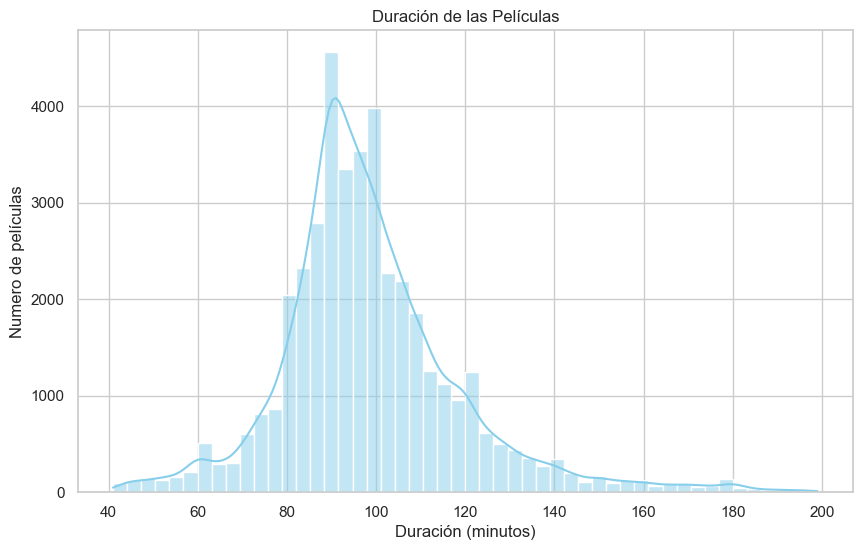

In [9]:
#GRAFICO 7, DURACIÓN DE PELICULAS
#filtrar peliculas con duración mayor a 40 y menor a 200
filtered_movies = movies_metadata[(movies_metadata['runtime'] > 40) & (movies_metadata['runtime'] < 200)]
plt.figure(figsize=(10, 6))
sns.histplot(filtered_movies['runtime'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Duración de las Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Numero de películas')
plt.savefig(os.path.join(carpeta_graficos, 'duracion.png'))
plt.show()

C:\Users\Mati\AppData\Local\Temp\ipykernel_15828\1597286635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='title', data=top_20_revenue, palette='viridis')


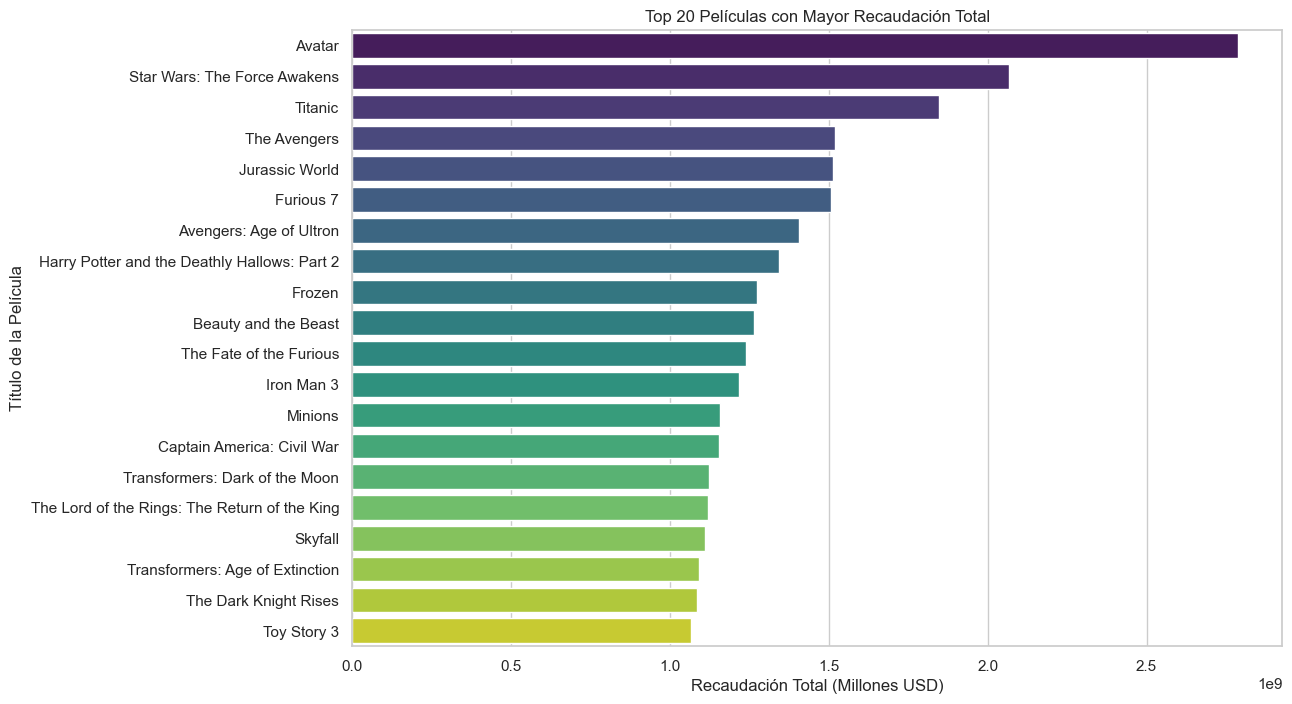

In [10]:
#GRAFICO 8, TOP RECAUDACIONES
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')
top_20_revenue = movies_metadata[['title', 'revenue']].dropna().sort_values(by='revenue', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='revenue', y='title', data=top_20_revenue, palette='viridis')
plt.title('Top 20 Películas con Mayor Recaudación Total')
plt.xlabel('Recaudación Total (Millones USD)')
plt.ylabel('Título de la Película')
plt.savefig(os.path.join(carpeta_graficos, 'top-recaudaciones.png'))
plt.show()

C:\Users\Mati\AppData\Local\Temp\ipykernel_15828\2940692035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_votes['vote_average'] = valid_votes['vote_average'].round()#redondear las valoraciones a números enteros
C:\Users\Mati\AppData\Local\Temp\ipykernel_15828\2940692035.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_counts.index, y=vote_counts.values, palette='coolwarm')


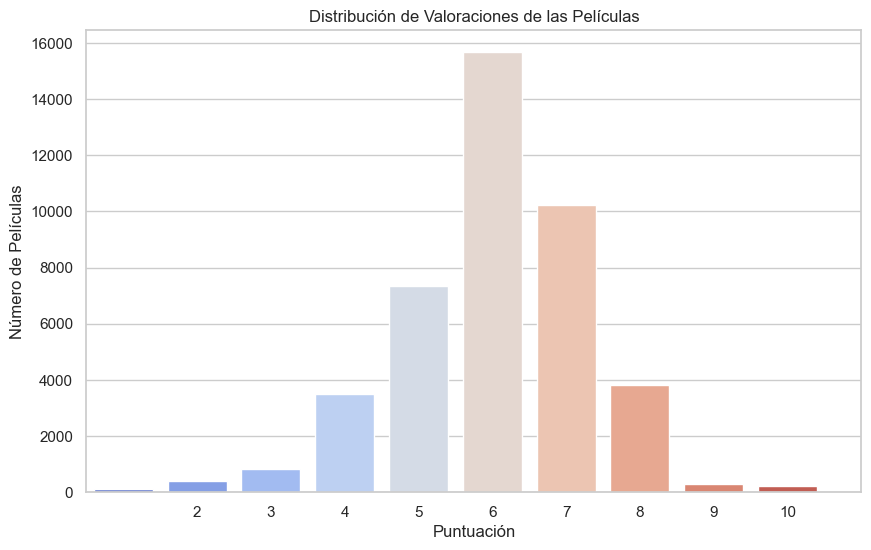

In [11]:
#GRAFICO 9, PUNTUACIONES DE PELICULAS
movies_metadata['vote_average'] = pd.to_numeric(movies_metadata['vote_average'], errors='coerce')
valid_votes = movies_metadata[(movies_metadata['vote_average'] >= 1) & (movies_metadata['vote_average'] <= 10)]
valid_votes['vote_average'] = valid_votes['vote_average'].round()#redondear las valoraciones a números enteros
vote_counts = valid_votes['vote_average'].value_counts().sort_index()
vote_counts = vote_counts.reindex(range(1, 11), fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=vote_counts.index, y=vote_counts.values, palette='coolwarm')
plt.title('Distribución de Valoraciones de las Películas')
plt.xlabel('Puntuación')
plt.ylabel('Número de Películas')
plt.xticks(range(1, 11))
plt.savefig(os.path.join(carpeta_graficos, 'puntuaciones.png'))
plt.show()

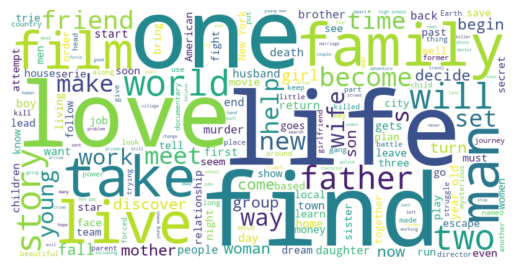

In [12]:
#GRAFICO 10, NUBE DE PALABRAS
text = ' '.join(movies_metadata['overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(os.path.join(carpeta_graficos, 'nube-palabras.png'))

C:\Users\Mati\AppData\Local\Temp\ipykernel_15828\2550487586.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts_df.head(20), x='Genre', y='Count', palette='viridis')


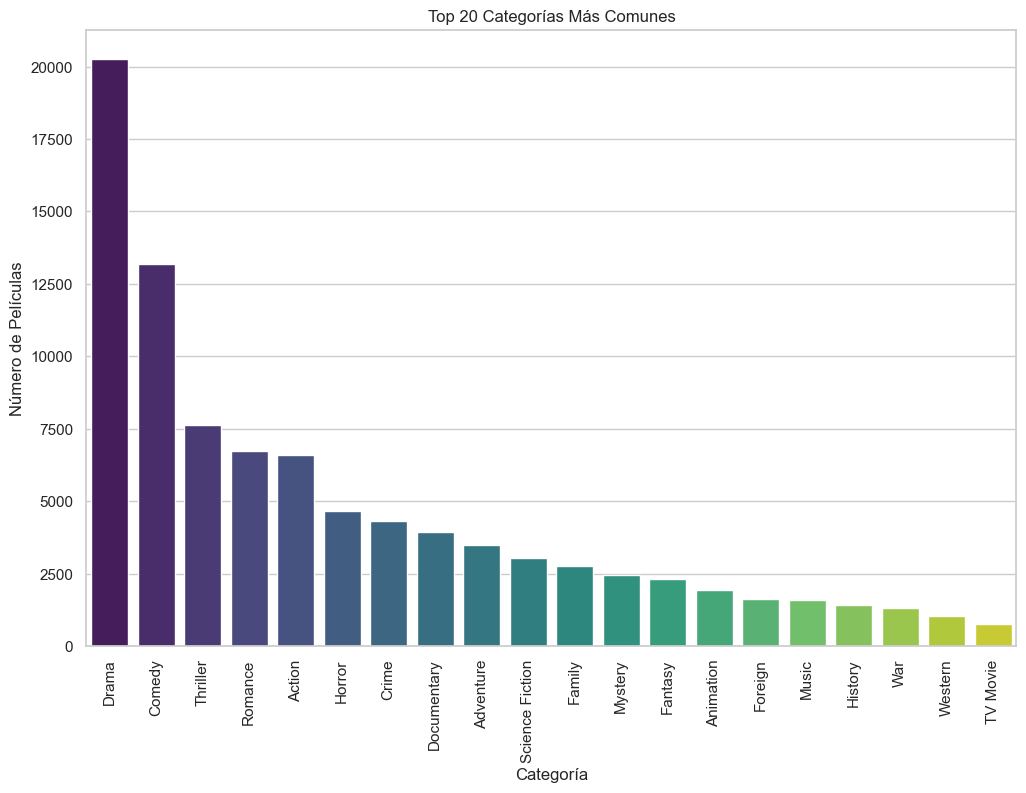

In [13]:
#GRAFICO 11, TOP GENEROS DE PELICULAS
movies_metadata['genres'] = movies_metadata['genres'].astype(str)

def extract_genres(genres): #función para extraer géneros
    if pd.isna(genres):
        return []
    try:
        genre_list = ast.literal_eval(genres)
        return [genre['name'] for genre in genre_list]
    except (ValueError, SyntaxError):
        return []

movies_metadata['genres'] = movies_metadata['genres'].apply(extract_genres)
all_genres = [genre for sublist in movies_metadata['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts_df.head(20), x='Genre', y='Count', palette='viridis')
plt.title('Top 20 Categorías Más Comunes')
plt.xlabel('Categoría')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.savefig(os.path.join(carpeta_graficos, 'top-categorias.png'))
plt.show()
